In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("UBER.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       605 non-null    object 
 1   Open       605 non-null    float64
 2   High       605 non-null    float64
 3   Low        605 non-null    float64
 4   Close      605 non-null    float64
 5   Adj Close  605 non-null    float64
 6   Volume     605 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.2+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,605.000000,605.000000,605.000000,605.000000,605.000000,6.050000e+02
mean,40.237056,41.010066,39.353188,40.189917,40.189917,2.357439e+07
std,9.796123,9.878262,9.649565,9.737607,9.737607,1.727050e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.369999,33.020000,31.450001,32.470001,32.470001,1.352820e+07
50%,38.880001,39.240002,37.389999,38.480000,38.480000,1.922350e+07
75%,48.490002,49.619999,47.750000,48.410000,48.410000,2.860960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


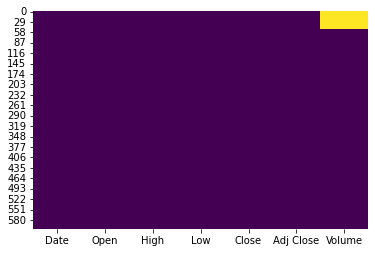

In [6]:
data2 = data.copy()
data2.iloc[1:50,data2.columns.get_loc('Volume')] = None

sns.heatmap(data2.isnull(),cbar=False,cmap = 'viridis') # to check null values

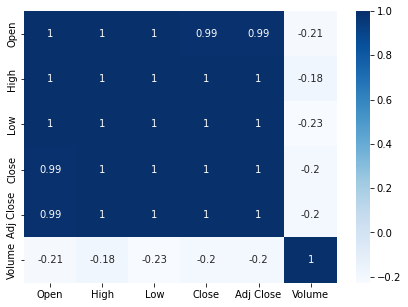

In [7]:
# correlation matrix 
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True) 

In [8]:
# How does the difference between opening and high value affects the trading volume
# Does the difference between opening and low value affects the trading volume
# Is the trading volume any different in the start of the week compared to other days
# How much % of times does the closing value close to low and high prices
# Is there any consecutiveness in the stocks closing price

In [9]:
data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['close-low'] = data['Close'] - data['Low']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,-3.000000,0.939999,-3.430000,0.509999,3.939999,0.430000
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-0.450001,2.709999,-2.140004,1.019996,3.160000,1.690003
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,-1.649998,1.460003,0.000000,3.110001,3.110001,-1.649998
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,-2.510002,0.419998,-0.590000,2.340000,2.930000,-1.920002
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,-2.580001,0.230000,-1.060001,1.750000,2.810001,-1.520000


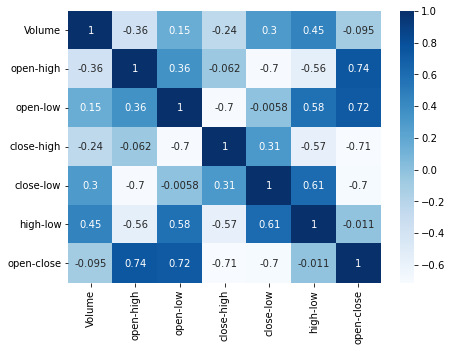

In [10]:
data2 = data.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True) 

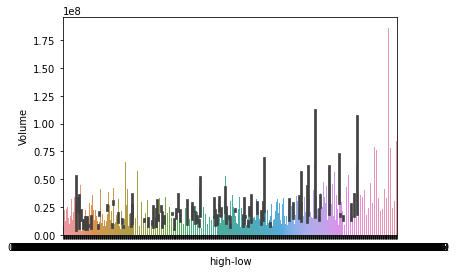

In [17]:
# sns.set_theme(style = 'whitegrid')
# f,ax = plt.subplots(figsize = (7,7))
# sns.despine(f, left=True,bottom=True)

# ax = sns.scatterplot(x=data['Volume'],y=data["open-low"])
sns.barplot(data=data, x = "high-low", y="Volume")
# sns.lineplot(data['high-low'], data['Volume'])
# sns.regplot(data['high-low'], data['Volume'])

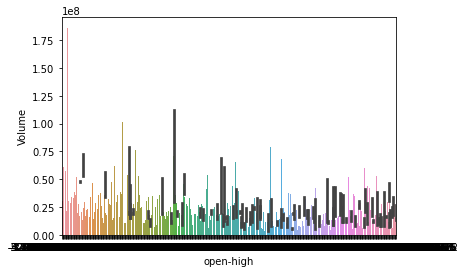

In [18]:
sns.barplot(data=data, x = "open-high", y="Volume")

In [60]:
# 44444444444
l = len(data)
data['inc-dec'] = 0
for i in range(1,l):
    if data.iloc[i]['Close']-data.iloc[i-1]['Close']>0:
        data.iloc[i, data.columns.get_loc('inc-dec')] = 1
        
    if data.iloc[i]['Close']-data.iloc[i-1]['Close']<0:
        data.iloc[i, data.columns.get_loc('inc-dec')] = -1
data['inc-dec'].value_counts()

-1    305
 1    295
 0      5
Name: inc-dec, dtype: int64

In [ ]:
data.nunique()

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
sns.kdeplot(x=data['open-high'],y=data['Volume'])

In [ ]:
# sns.pairplot(data, hue="open-high",size=2.5)
# x =data['Volume'].sort_values(ascending=False)
data[data['Volume']==1.863225e+08	]